In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

In [2]:
data = pd.read_csv("C:\\Users\\chira\\Desktop\\Vehicle_policies_2020.csv")

In [3]:
df = data.sample(n=5000)

In [4]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
55121,96856008,2/2/2020,F,1.0,11/9/1993,377.0,A,104.8,3,SEDAN,1.584,NaN,0,0.0,716.53
9521,67585965,11/3/2020,F,2.0,4/11/1985,657.0,D,126.5,2,SEDAN,1.694,NaN,0,0.0,716.53
55472,79561673,1/31/2020,M,5.0,7/28/1953,706.0,B,105.5,4,STNWG,1.276,NaN,0,0.0,716.53
26954,14576738,7/22/2020,F,4.0,12/9/1968,661.0,D,96.5,1,SEDAN,2.849,NaN,0,0.0,716.53
7043,15890314,11/18/2020,M,4.0,3/21/1964,625.0,C,130.5,4,HDTOP,1.111,NaN,0,0.0,716.53


In [5]:
df.tail()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
39272,75578848,5/8/2020,M,2.0,4/4/1981,545.0,B,140.2,1,UTE,2.002,D,1,6200.837016,716.53
24271,33531864,8/7/2020,F,6.0,7/19/1941,333.0,C,133.5,1,HBACK,1.562,A,1,14212.409550,716.53
575,97779376,12/27/2020,F,5.0,1/7/1950,784.0,C,148.5,2,SEDAN,1.914,NaN,0,0.000000,716.53
41533,64995517,4/25/2020,M,3.0,12/11/1974,590.0,F,118.0,3,STNWG,4.114,NaN,0,0.000000,716.53
37669,33701744,5/18/2020,F,3.0,9/7/1978,651.0,F,104.0,3,STNWG,3.234,NaN,0,0.000000,716.53


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 55121 to 37669
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      5000 non-null   int64  
 1   pol_eff_dt      5000 non-null   object 
 2   gender          5000 non-null   object 
 3   agecat          4603 non-null   float64
 4   date_of_birth   5000 non-null   object 
 5   credit_score    4774 non-null   float64
 6   area            5000 non-null   object 
 7   traffic_index   4681 non-null   float64
 8   veh_age         5000 non-null   int64  
 9   veh_body        5000 non-null   object 
 10  veh_value       5000 non-null   float64
 11  claim_office    856 non-null    object 
 12  numclaims       5000 non-null   int64  
 13  claimcst0       5000 non-null   float64
 14  annual_premium  5000 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 625.0+ KB


In [7]:
df.describe()

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
count,5.000000e+03,4603.000000,4774.000000,4681.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,5.549110e+07,3.505323,660.569962,104.554604,2.667000,1.963052,0.224600,731.372504,7.165300e+02
std,2.599393e+07,1.417944,136.548316,34.280226,1.060347,1.311161,0.565525,3763.655402,7.072029e-11
min,1.001386e+07,1.000000,301.000000,4.500000,1.000000,0.000000,0.000000,0.000000,7.165300e+02
25%,3.282367e+07,2.000000,601.000000,80.100000,2.000000,1.122000,0.000000,0.000000,7.165300e+02
50%,5.587137e+07,4.000000,682.000000,109.500000,3.000000,1.650000,0.000000,0.000000,7.165300e+02
75%,7.825404e+07,5.000000,768.000000,132.900000,4.000000,2.378750,0.000000,0.000000,7.165300e+02
max,9.999657e+07,6.000000,850.000000,190.900000,4.000000,16.038000,5.000000,65070.336420,7.165300e+02


In [8]:
df.shape

(5000, 15)

In [9]:
df.isnull().sum()

pol_number           0
pol_eff_dt           0
gender               0
agecat             397
date_of_birth        0
credit_score       226
area                 0
traffic_index      319
veh_age              0
veh_body             0
veh_value            0
claim_office      4144
numclaims            0
claimcst0            0
annual_premium       0
dtype: int64

In [10]:
df['agecat'].mean()

3.5053226156854227

In [11]:
df['agecat'] = df['agecat'].fillna(3.47)

In [12]:
df['credit_score'].mean()

660.5699622957687

In [13]:
df['credit_score'] = df['credit_score'].fillna(661.41)

In [14]:
df['traffic_index'].mean()

104.5546037171545

In [15]:
df['traffic_index'] = df['traffic_index'].fillna(103.28)

In [16]:
df.isnull().sum()

pol_number           0
pol_eff_dt           0
gender               0
agecat               0
date_of_birth        0
credit_score         0
area                 0
traffic_index        0
veh_age              0
veh_body             0
veh_value            0
claim_office      4144
numclaims            0
claimcst0            0
annual_premium       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 55121 to 37669
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      5000 non-null   int64  
 1   pol_eff_dt      5000 non-null   object 
 2   gender          5000 non-null   object 
 3   agecat          5000 non-null   float64
 4   date_of_birth   5000 non-null   object 
 5   credit_score    5000 non-null   float64
 6   area            5000 non-null   object 
 7   traffic_index   5000 non-null   float64
 8   veh_age         5000 non-null   int64  
 9   veh_body        5000 non-null   object 
 10  veh_value       5000 non-null   float64
 11  claim_office    856 non-null    object 
 12  numclaims       5000 non-null   int64  
 13  claimcst0       5000 non-null   float64
 14  annual_premium  5000 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 625.0+ KB


In [18]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
55121,96856008,2/2/2020,F,1.0,11/9/1993,377.0,A,104.8,3,SEDAN,1.584,NaN,0,0.0,716.53
9521,67585965,11/3/2020,F,2.0,4/11/1985,657.0,D,126.5,2,SEDAN,1.694,NaN,0,0.0,716.53
55472,79561673,1/31/2020,M,5.0,7/28/1953,706.0,B,105.5,4,STNWG,1.276,NaN,0,0.0,716.53
26954,14576738,7/22/2020,F,4.0,12/9/1968,661.0,D,96.5,1,SEDAN,2.849,NaN,0,0.0,716.53
7043,15890314,11/18/2020,M,4.0,3/21/1964,625.0,C,130.5,4,HDTOP,1.111,NaN,0,0.0,716.53


In [19]:
df = df.replace(['?'],'NaN')

In [20]:
df['claim_office'].value_counts()

B    328
D    261
A    198
C     69
Name: claim_office, dtype: int64

In [21]:
df.dropna(axis=0, inplace=True)

In [22]:
df.shape

(856, 15)

In [23]:
df.isnull().sum()

pol_number        0
pol_eff_dt        0
gender            0
agecat            0
date_of_birth     0
credit_score      0
area              0
traffic_index     0
veh_age           0
veh_body          0
veh_value         0
claim_office      0
numclaims         0
claimcst0         0
annual_premium    0
dtype: int64

In [24]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
17054,78749272,9/19/2020,M,1.0,1/23/1998,614.0,A,83.4,2,STNWG,4.389,C,1,1416.179677,716.53
8026,35578712,11/12/2020,M,3.0,9/19/1973,329.0,C,144.0,2,SEDAN,2.739,B,2,6327.111990,716.53
19672,30827898,9/3/2020,M,4.0,7/26/1960,466.0,A,107.6,3,STNWG,2.420,A,3,6918.267395,716.53
15400,45109819,9/29/2020,F,4.0,7/14/1962,326.0,C,144.0,4,SEDAN,0.836,B,1,1315.448997,716.53
16411,88803307,9/23/2020,M,5.0,8/24/1950,729.0,B,95.5,2,SEDAN,1.694,B,2,2376.685815,716.53


In [25]:
df_corr = df.corr()

In [26]:
df_corr

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
pol_number,1.000000,0.032725,-0.011621,-0.032648,-0.014944,-0.024508,0.049034,0.044972,NaN
agecat,0.032725,1.000000,0.100568,0.034414,0.000189,-0.072287,0.012930,0.063629,NaN
credit_score,-0.011621,0.100568,1.000000,-0.010155,0.037267,-0.025452,0.052818,-0.318887,NaN
traffic_index,-0.032648,0.034414,-0.010155,1.000000,0.015823,-0.059071,-0.026466,-0.147415,NaN
veh_age,-0.014944,0.000189,0.037267,0.015823,1.000000,-0.576148,-0.001195,-0.381035,NaN
veh_value,-0.024508,-0.072287,-0.025452,-0.059071,-0.576148,1.000000,-0.025139,0.306382,NaN
numclaims,0.049034,0.012930,0.052818,-0.026466,-0.001195,-0.025139,1.000000,0.191544,NaN
claimcst0,0.044972,0.063629,-0.318887,-0.147415,-0.381035,0.306382,0.191544,1.000000,NaN
annual_premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

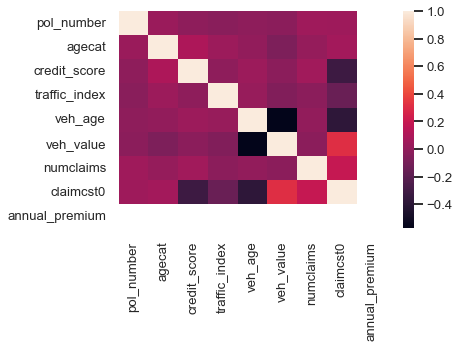

In [27]:
sns.heatmap(df_corr)

In [28]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
17054,78749272,9/19/2020,M,1.0,1/23/1998,614.0,A,83.4,2,STNWG,4.389,C,1,1416.179677,716.53
8026,35578712,11/12/2020,M,3.0,9/19/1973,329.0,C,144.0,2,SEDAN,2.739,B,2,6327.111990,716.53
19672,30827898,9/3/2020,M,4.0,7/26/1960,466.0,A,107.6,3,STNWG,2.420,A,3,6918.267395,716.53
15400,45109819,9/29/2020,F,4.0,7/14/1962,326.0,C,144.0,4,SEDAN,0.836,B,1,1315.448997,716.53
16411,88803307,9/23/2020,M,5.0,8/24/1950,729.0,B,95.5,2,SEDAN,1.694,B,2,2376.685815,716.53


In [29]:
num_atr = ['pol_number','pol_eff_dt','gender','agecat','date_of_birth','credit_score','area','traffic_index','veh_age','veh_body','veh_value','claim_office','numclaims','claimcst0','annual_premium']

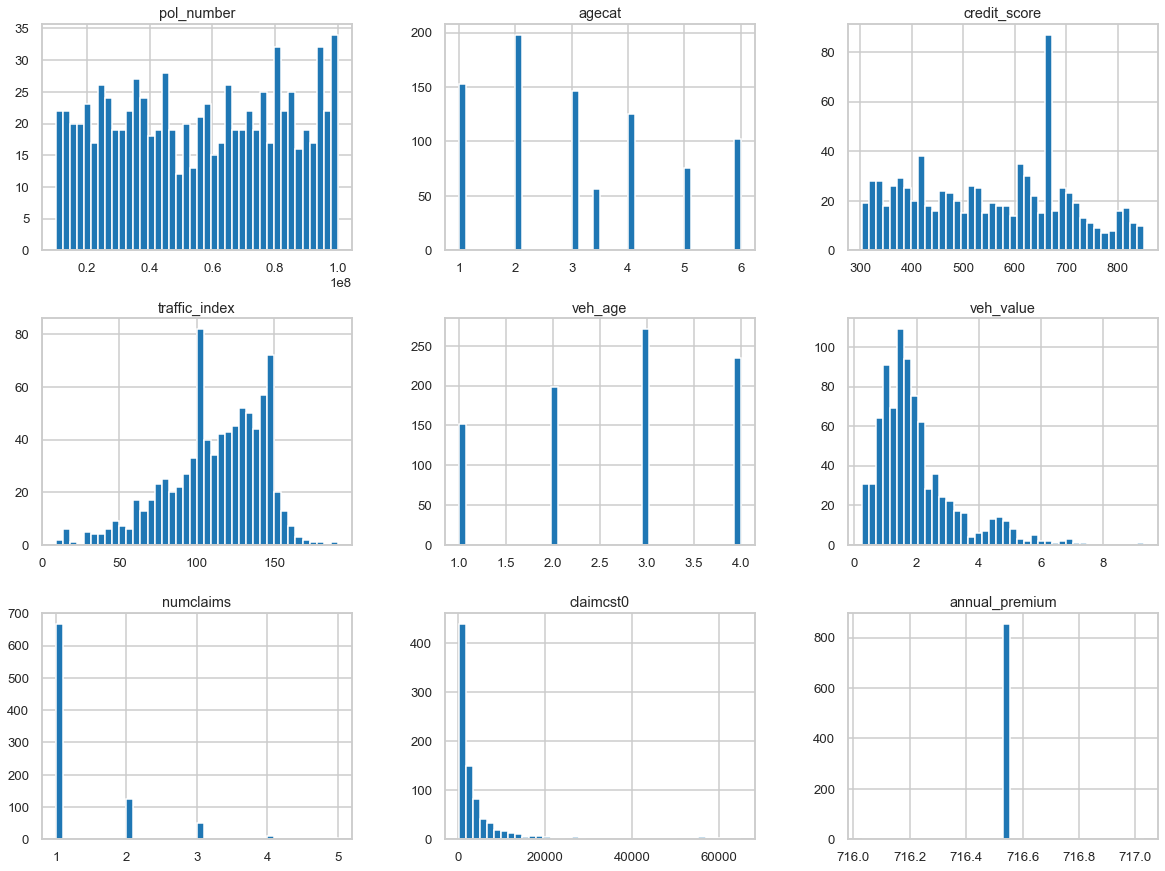

In [30]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

In [31]:
df.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
17054,78749272,9/19/2020,M,1.0,1/23/1998,614.0,A,83.4,2,STNWG,4.389,C,1,1416.179677,716.53
8026,35578712,11/12/2020,M,3.0,9/19/1973,329.0,C,144.0,2,SEDAN,2.739,B,2,6327.111990,716.53
19672,30827898,9/3/2020,M,4.0,7/26/1960,466.0,A,107.6,3,STNWG,2.420,A,3,6918.267395,716.53
15400,45109819,9/29/2020,F,4.0,7/14/1962,326.0,C,144.0,4,SEDAN,0.836,B,1,1315.448997,716.53
16411,88803307,9/23/2020,M,5.0,8/24/1950,729.0,B,95.5,2,SEDAN,1.694,B,2,2376.685815,716.53


In [32]:
df.drop(['pol_eff_dt'], axis=1, inplace=True)
df.drop(['gender'], axis=1, inplace=True)
df.drop(['date_of_birth'], axis=1, inplace=True)
df.drop(['area'], axis=1, inplace=True)
df.drop(['veh_body'], axis=1, inplace=True)
df.drop(['claim_office'], axis=1, inplace=True)


In [33]:
df.head()

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
17054,78749272,1.0,614.0,83.4,2,4.389,1,1416.179677,716.53
8026,35578712,3.0,329.0,144.0,2,2.739,2,6327.111990,716.53
19672,30827898,4.0,466.0,107.6,3,2.420,3,6918.267395,716.53
15400,45109819,4.0,326.0,144.0,4,0.836,1,1315.448997,716.53
16411,88803307,5.0,729.0,95.5,2,1.694,2,2376.685815,716.53


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 17054 to 24271
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      856 non-null    int64  
 1   agecat          856 non-null    float64
 2   credit_score    856 non-null    float64
 3   traffic_index   856 non-null    float64
 4   veh_age         856 non-null    int64  
 5   veh_value       856 non-null    float64
 6   numclaims       856 non-null    int64  
 7   claimcst0       856 non-null    float64
 8   annual_premium  856 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 66.9 KB


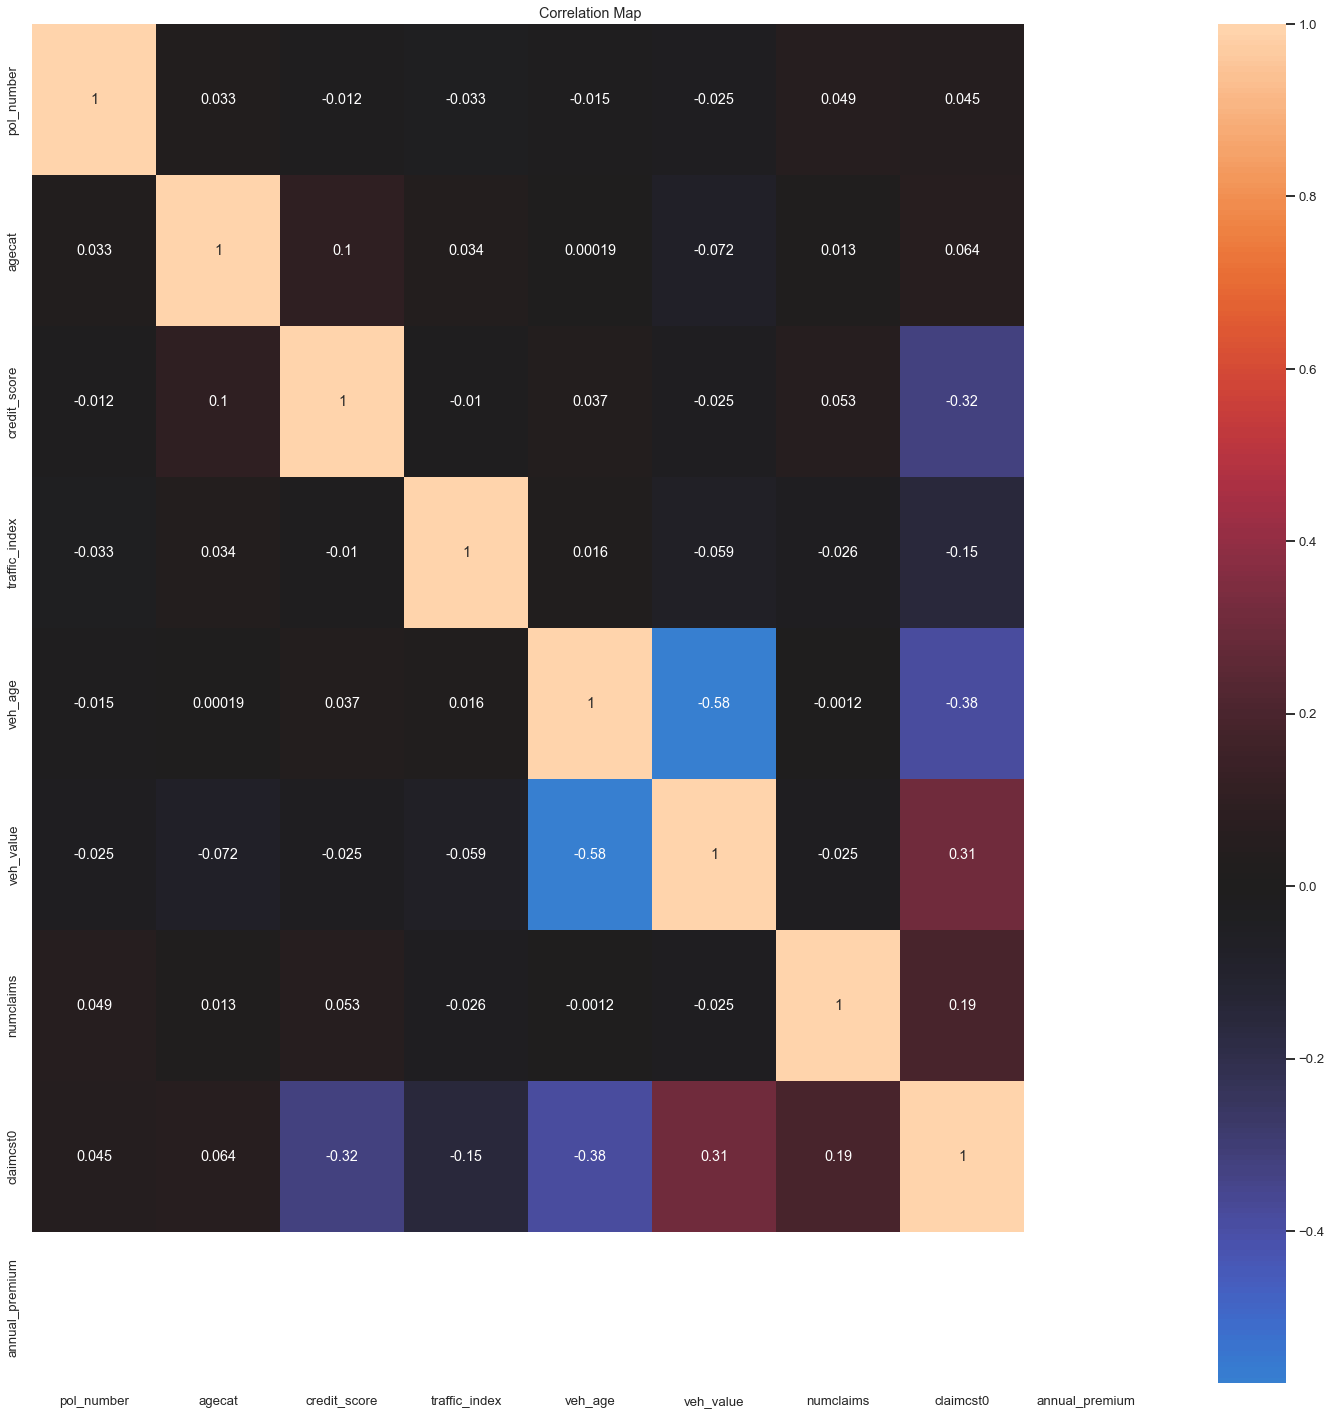

In [35]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

<Figure size 432x288 with 0 Axes>

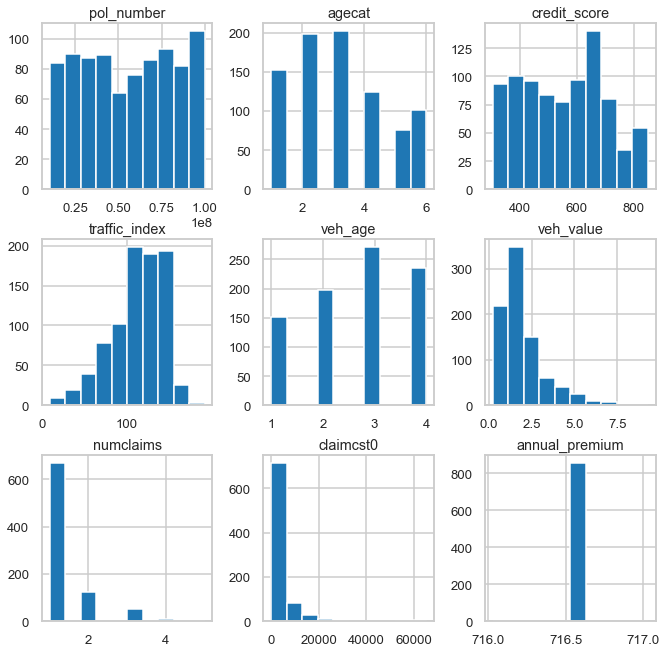

<Figure size 432x288 with 0 Axes>

In [36]:
df.hist(figsize=(11,11))
plt.figure()

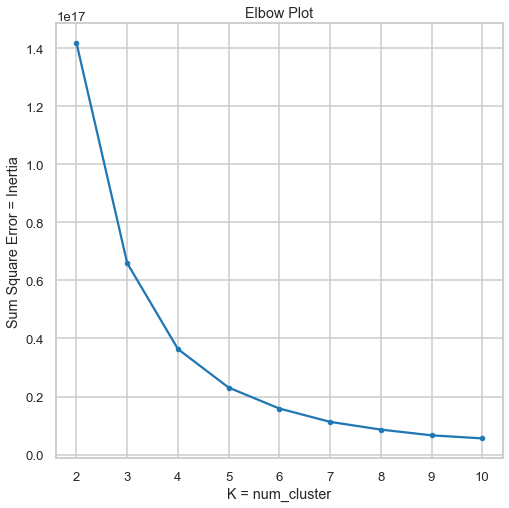

In [37]:
from sklearn.cluster import KMeans

x_cols = np.array(df.iloc[:, :32])
ss = [];
ks = range(2, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(x_cols)
    ss.append(kmeans.inertia_)
f, axes = plt.subplots(figsize=(8, 8))
axes.plot(ks, ss, marker='.')
axes.set(xlabel='K = num_cluster', ylabel = 'Sum Square Error = Inertia', title = 'Elbow Plot')
plt.show()

In [38]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(df)
df_scaled_array = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled_array, columns = df.columns)

df_scaled.sample(5)

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
265,0.979245,-0.707563,0.207707,-0.338148,1.240292,-0.923956,-0.469559,-0.490557,0.0
572,-0.294919,0.218602,-0.540043,-1.365928,0.294887,0.494054,-0.469559,0.045325,0.0
767,-1.503266,1.812614,-0.934311,-1.447239,0.294887,-0.681856,-0.469559,-0.003470,0.0
700,1.383945,-0.707563,-1.695656,-0.383683,-0.650518,-0.137133,-0.469559,-0.304474,0.0
159,0.194868,-0.707563,-1.620881,0.152974,0.294887,-0.820199,-0.469559,-0.205772,0.0


In [39]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(df_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(df_scaled)
y_cluster_kmeans

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,

In [40]:
from sklearn import metrics
score = metrics.silhouette_score(df_scaled, y_cluster_kmeans)
score

0.14306978826770045

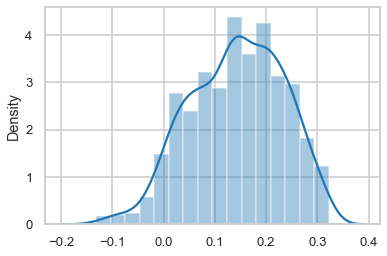

In [41]:
scores = metrics.silhouette_samples(df_scaled, y_cluster_kmeans)
sns.distplot(scores);

In [42]:
#K-Means Clustering

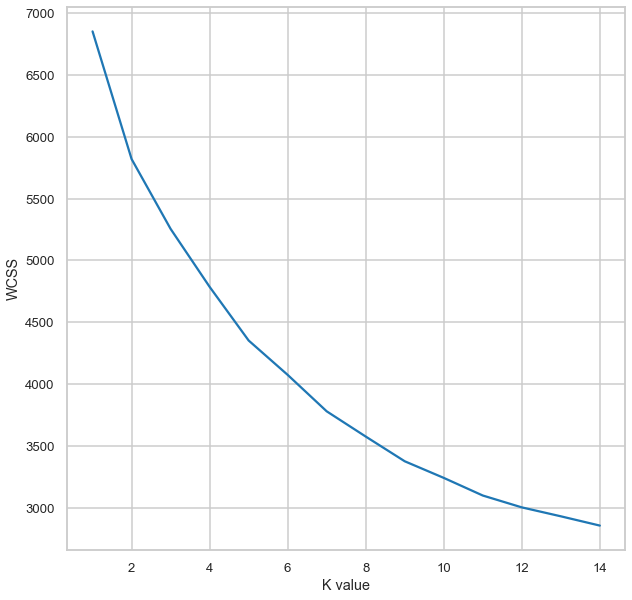

In [43]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df_scaled)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

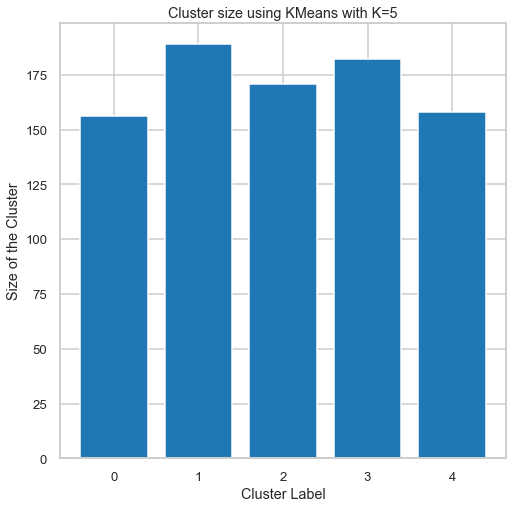

In [44]:
# Pick 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
df['labels'] = kmeans.fit_predict(x_cols)
cluster_size = df.labels.value_counts()
f, axes = plt.subplots(figsize=(8, 8))
axes.bar(cluster_size.index, cluster_size)
axes.set(xlabel='Cluster Label', ylabel='Size of the Cluster', title='Cluster size using KMeans with K=5')
plt.show()
df= df.drop('labels', axis=1)

In [45]:
#The Silhouette Method

n_cluster=3, Average silhouette score = 0.589
n_cluster=4, Average silhouette score = 0.576
n_cluster=5, Average silhouette score = 0.569
n_cluster=6, Average silhouette score = 0.561
n_cluster=7, Average silhouette score = 0.565
n_cluster=8, Average silhouette score = 0.562
n_cluster=9, Average silhouette score = 0.570
n_cluster=10, Average silhouette score = 0.561


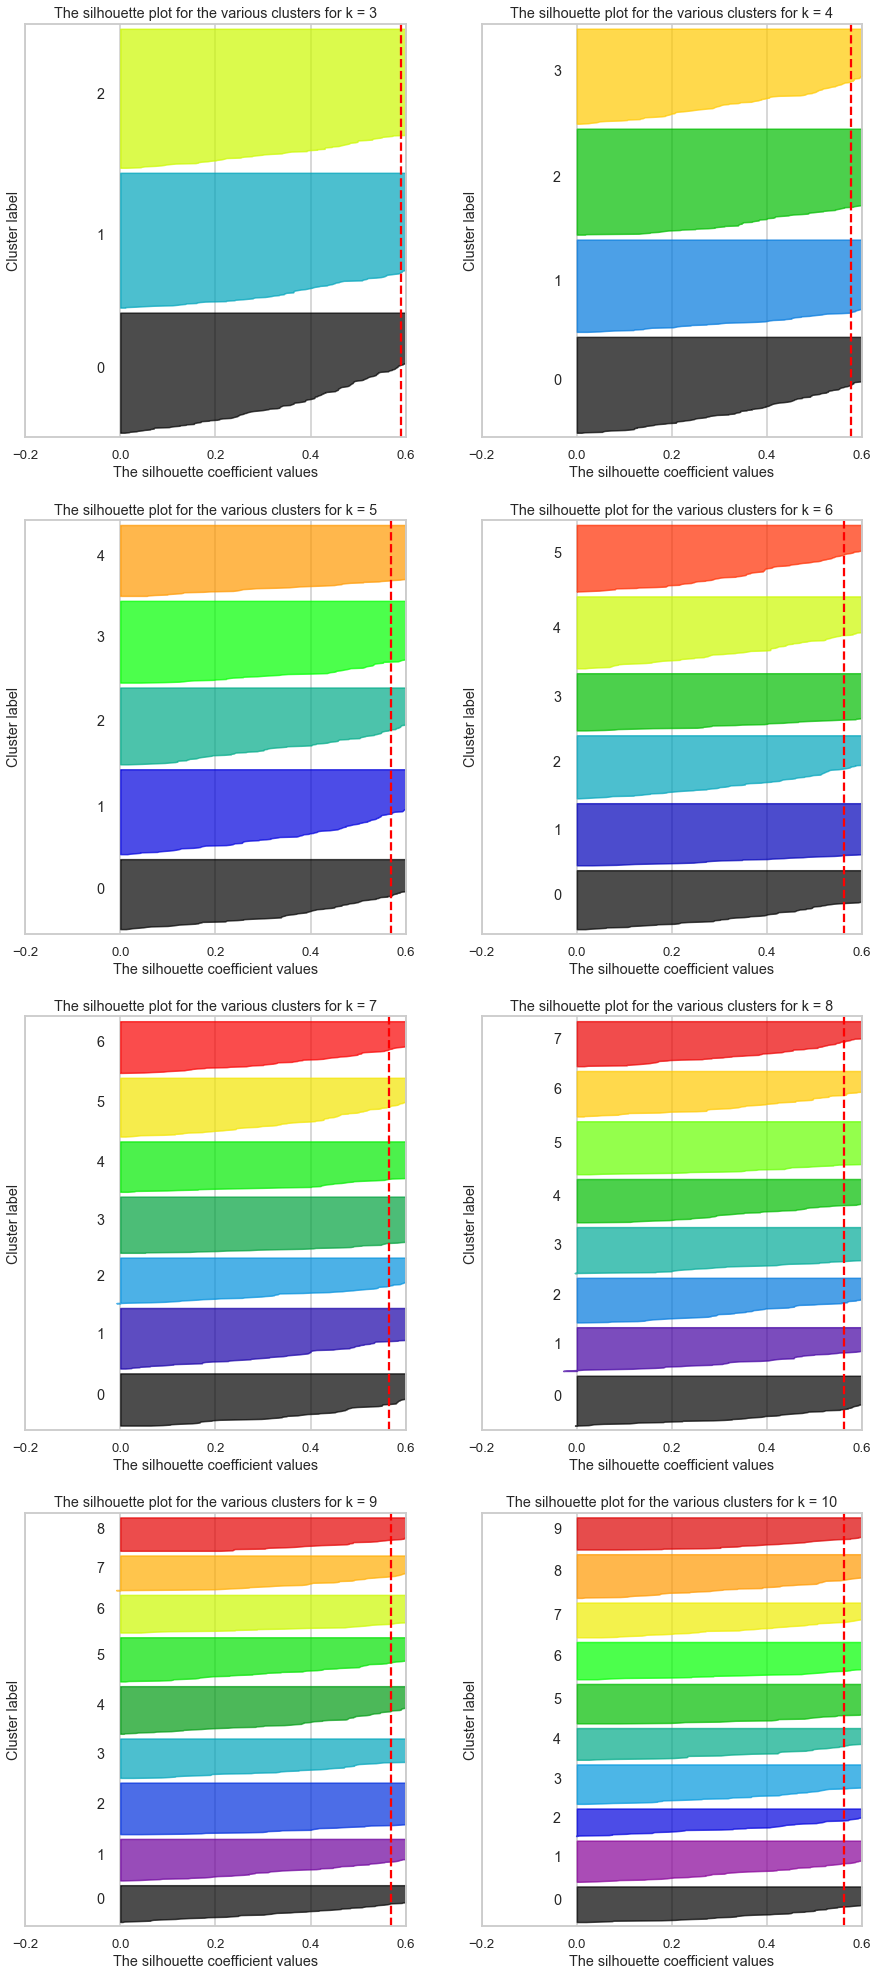

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
ks = range(3, 11)
f, axes = plt.subplots(len(ks)//2, 2, figsize=(15, 35))
silhouette_avg = []
for idx, k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(x_cols)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg.append(silhouette_score(x_cols, labels))
    print('n_cluster={0}, Average silhouette score = {1:.3f}'.format(k, silhouette_avg[-1]))
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, labels)
    
    # xlim: The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 0.6]
    # ylim: The (n_clusters+1)*10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate them clearly.
    axes[idx//2, idx%2].set(xlim=[-0.2, 0.6], ylim=[0, len(x_cols)+(k+1)*10])
    y_lower=10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        axes[idx//2, idx%2].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axes[idx//2, idx%2].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    axes[idx//2, idx%2].set(xlabel='The silhouette coefficient values', ylabel='Cluster label')
    axes[idx//2, idx%2].set(title='The silhouette plot for the various clusters for k = {}'.format(k))
    axes[idx//2, idx%2].axvline(x=silhouette_avg[-1], color='red', linestyle='--')
    axes[idx//2, idx%2].set(yticks=[], xticks=[-0.2, 0, 0.2, 0.4, 0.6])

In [47]:
df.head()

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
17054,78749272,1.0,614.0,83.4,2,4.389,1,1416.179677,716.53
8026,35578712,3.0,329.0,144.0,2,2.739,2,6327.111990,716.53
19672,30827898,4.0,466.0,107.6,3,2.420,3,6918.267395,716.53
15400,45109819,4.0,326.0,144.0,4,0.836,1,1315.448997,716.53
16411,88803307,5.0,729.0,95.5,2,1.694,2,2376.685815,716.53


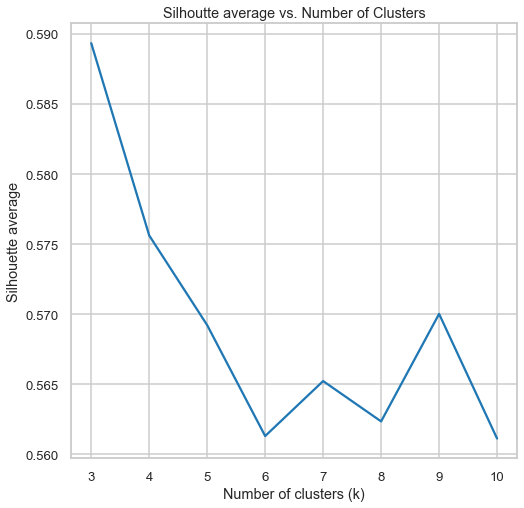

In [48]:
f, axes = plt.subplots(figsize=(8, 8))
axes.plot(ks, silhouette_avg)
axes.set(xlabel='Number of clusters (k)',ylabel = 'Silhouette average', title ='Silhoutte average vs. Number of Clusters')
plt.show()

In [49]:
#Agglomerative Clustering

In [50]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
algo_sil_score = pd.DataFrame(index=[ 'Agglomerative Clustering'])
algo_sil_score['algo_avg_silhouette_score']=0
algo_sil_score['cluster_size']=0

k_range = range(2, 11)
l_types = ['ward', 'complete', 'average']
#l_types = ['complete']
max_sil_score = -np.inf
best_k, best_l = None, None
for k in k_range:
    for l in l_types:
        ac = AgglomerativeClustering(n_clusters=k, linkage=l)
        labels = ac.fit_predict(x_cols)
        score = metrics.silhouette_score(x_cols, labels)
        (best_k, best_l, max_sil_score) = (k, l, score) if score>max_sil_score else (best_k, best_l, max_sil_score)
        #print(k, l, score, max_sil_score)
print('Best num cluster = {0:d}, Best linkage = {1}, Best silhouette score = {2:.3f}'.format(best_k, best_l, max_sil_score))

ac = AgglomerativeClustering(n_clusters=best_k, linkage=best_l)
labels = ac.fit_predict(x_cols)
print('Average Silhouette Score: {0:.3f}'.format(metrics.silhouette_score(x_cols, labels)))
algo_sil_score.loc['Agglomerative Clustering'] = [max_sil_score, best_k]

Best num cluster = 2, Best linkage = average, Best silhouette score = 0.644
Average Silhouette Score: 0.644


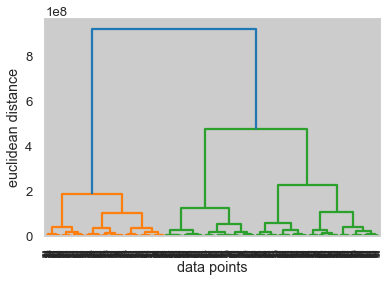

In [52]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()